# **K-NN con Scikit-learn**


---
---

### **Generalidades**

-  El algoritmo K-Nearest Neighbors es un modelo de aprendizaje supervisado utilizado para clasificación y regresión (comunmente, se usa mucho más para clasificación).

-  En clasificación almacena todos los datos disponibles (el conjunto de datos de entrenamiento $D_{train}$), y cuando llegan datos nuevos, los clasifica en función de la similitud con los almacenados, es decir, en una categoría similar a ellos.

-  Por ejemplo, para clasificar un animal como perro o gato, K-NN toma una medida de similitud con el conjunto de entrenamiento (imágenes de perros y gatos) que le permitirá encontrar características similares a las de los nuevos datos. En función de las caracterísiticas más similares las coloca en la categoría perro o en la de gato.


---

### **El modelo K-NN para clasificación**

Sea $D_{train}=\{\vec{x}_i, y_i\}_{i=1}^n$, en donde los $\vec{x}_i \in \mathbb{R}^d$ son los vectores de características y $y_i$ son las etiquetas asociadas al problema de clasificación bajo aprendizaje supervisado.

Dada una muestra de prueba, un par de datos nuevos $(\vec{x}', y')$, calculamos su proximidad con el resto de datos en $D_{train}$.

El modelo K-NN de una muestra de prueba se refiere a los K puntos más cercanos a ella.

Por ejemplo, la siguiente imagen (tomada del libro *Tan, P.-N., Steinbach, M., & Kumar, V. (2014). Introduction to data mining (2nd ed.). Pearson Education Limited.*) esquematiza los, 1-, 2- y 3-NN de una muestra.

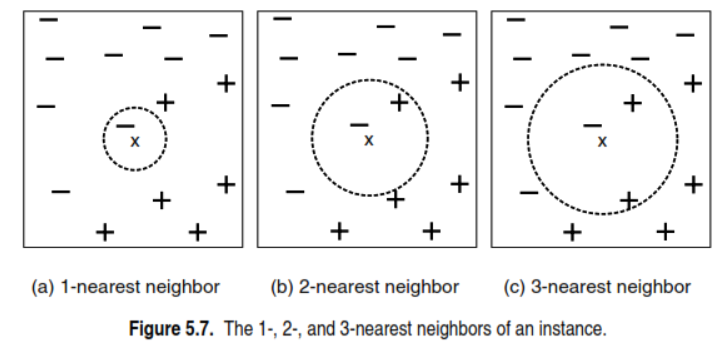

---

### **Algoritmo K-NN**

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°

1) Sea $K$ el número de vecinos más cercanos (NN) y $D_{train}$ el conjunto de datos de entrenamiento.

2) `for`  cada muestra de prueba $z=(\vec{x}', y')$ `do`:

3)  $\text{            }$ $\text{            }$ $\text{            }$  Calcular $d(\vec{x}', \vec{x})$

4)  $\text{            }$ $\text{            }$ $\text{            }$  Seleccionar $D_z \subseteq D_{train}$

5)  $\text{            }$ $\text{            }$ $\text{            }$  $y'=ArgMax_{y_i}\{ \sum_iI(y_i)\}$

6)  end `for`

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°

-  $d(\vec{x}', \vec{x})$ es la distancia entre $\vec{x}'$ y $\vec{x}$.

-  $D_z \subseteq D_{train}$ es el conjunto de $K$ muestras de entrenamiento a la muestra de prueba $z=(\vec{x}', y')$.

Una vez que se tienen los *Nearest Neighbors*, la muestra de prueba es clasificada basada en la clase mayoritaria de sus *Nearest Neighbors*.

El voto mayoritario tiene la forma analítica de $y'=ArgMax_{y_i}\{ \sum_iI(y_i)\}$, en donde $y_i$ es la etiqueta de la clase, y

$$
I(y_i) =
\begin{cases}
1, & \text{si } y_i \text{ es verdadera} \\
0, & \text{otro caso }
\end{cases}
$$

---

### **La distancia en K-NN**

Una distancia o métrica es una función $d: \mathbb{R}^n \times \mathbb{R}^n → \mathbb{R}^+ ∪ \{ 0 \}$ que satisface las siguientes propiedades:

1) $d(\vec{x}, \vec{y}) \geq 0, \text{ } \forall \vec{x}, \vec{y} \in \mathbb{R}^n$

2) $d(\vec{x}, \vec{y}) = 0 \iff \vec{x}=\vec{y} $

3) $d(\vec{x}, \vec{y}) = d(\vec{y}, \vec{x})$

4) $d(\vec{x}, \vec{y}) \leq d(\vec{x}, \vec{z}) + d(\vec{z}, \vec{y})$


De esta definición se desprenden varios tipos de distancias (no solo la euclidiana), mismas que podemos usar en K-NN.

Las más utilizadas son casos particulares de la métrica de Minkowski:

$$
d_{\text{Mink}}(\vec{x}, \vec{y}) = ||\vec{x} - \vec{y}||_p = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

* **Distancia euclidiana:**

  Si $\vec{x}=(x_1, \dots , x_n)$ y $\vec{y}=(y_1, \dots , y_n) \in \mathbb{R}^n$, la distancia euclidiana se define con $p=2$:
  
   $$
   d(\vec{x}, \vec{y}) = ||\vec{x} - \vec{y}||_2 = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
   $$

* **Distancia Manhattan:**

  La distancia Manhattan (o métrica del taxi) se define con $p=1$:

  $$
  d(\vec{x}, \vec{y}) = ||\vec{x} - \vec{y}||_1 = \sum_{i=1}^{n} |x_i - y_i|
  $$

Hay más variaciones de métricas, como la distancia euclidiana cuadrada:

$$
d(\vec{x}, \vec{y}) = ||\vec{x} - \vec{y}||_2 ^2  =\sum_{i=1}^{n} (x_i - y_i)^2
$$

Las recomendaciones comunes para usar una u otra distancia en K-NN son:

* Se tienen datos continuos y sin outliers, se usa la distancia euclidiana

* Si se tienen muchos datos atípicos, se usa la distancia Manhattan.

* Se tiene la capacidad computacional para probar varios valores de $p$ o hay algo especial por destacar, lo mejor es usar Minkowski.



---

### **El hiperparámetro $K$**

Puede haber varios caminos para elegir el mejor $K$, por ejemplo:

-  Suele ajustarse mediante [cross-validation](https://github.com/Bronquivoide/Machine_Learning_Fundamentals/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf), probando diferentes valores para evaluar el rendimiento, eligiendo el $K$ que optimiza el error o la métrica deseada de acuerdo al problema.

- Se puede elegir probando directamente un conjunto de modelos K-NN para un rango de valores de $K$, por ejemplo, `for K in range(1, 51)`.

- Combinando las dos ideas anteriores, se puede elegir de acuerdo a un algoritmo de búsqueda de hiperparámetros, como Grid Search Cross-Validation o Randomized Search Cross-Validation.

- Se toma usando **la regla empírica**. Esta regla postula que el valor óptimo de este hiperparámetro es $K=\sqrt{n}$, en donde $n$ es la cardinalidad del conjunto $D_{train}$.

Una convención muy útil para tomar $K$ es que, con base en los puntos anteriores, se tome $K$ impar para evitar problemas en la parte del voto mayoritario.

---

### **Sintaxis del modelo K-NN en scikit-learn**

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    knn = KNeighborsClassifier(n_neighbors, metric, p) #Por default, metric='euclidean' (por lo tanto p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    #Métrica (en este caso Accuracy):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)



---

### **Proyecto: K-NN para clasificar la presencia de una enfermedad cardiaca**

Usando una base de datos que contiene información sobre enfermedades cardiacas en pacientes de diversas zonas del mundo, la finalidad de implementar un algoritmo K-NN es realizar una clasificación binaria entre la presencia o ausencia de una enfermedad cardíaca.


Columnas del dataset:


* **id**: Identificación única para cada paciente.

* **age**: Edad del paciente en años.

* **dataset**: Lugar del estudio.

* **sex**: Sexo (variable binaria: Masculino/Femenino).

* **cp**: Tipo de dolor torácico (angina típica, angina atípica, no anginal, asintomático).

* **trestbps**: Presión arterial en reposo (en unidades $mmHg$ al momento de ingreso en el hospital).

* **chol**: Colesterol sérico en unidades $\frac{mg}{dL}$.

* **fbs**: Nivel de glucosa en ayunas > 120 $\frac{mg}{dL}$ (variable binaria: Verdadero/Falso).

* **restecg**: Resultados del electrocardiograma en reposo: normal, anomalía en ST-T, hipertrofia ventricular izquierda.

* **thalach**: Frecuencia cardíaca máxima alcanzada.

* **exang**: Angina inducida por el ejercicio (variable binaria: Verdadero/Falso).

* **oldpeak**: Depresión del segmento ST inducida por el ejercicio en relación con el reposo.

* **slope**: Pendiente del segmento ST en el ejercicio máximo.

* **ca**: Número de vasos principales (0-3) coloreados por fluoroscopía.

* **thal**: normal; defecto fijo; defecto reversible.

* **num**: Atributo predicho (variable binaria: enfermedad presente o ausente).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/K-NN/Cardiacas.xlsx'

df=pd.read_excel(file_path, sheet_name = "enfermedadescardiacas")

display(df.head())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.info())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.shape)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3,normal,1
2,3,67,Male,Cleveland,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0,normal,0


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    int64  
 6   chol      299 non-null    int64  
 7   fbs       299 non-null    bool   
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    int64  
 10  exang     299 non-null    bool   
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    int64  
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: bool(2), float64(1), int64(7), object(6)
memory usage: 33.4+ KB
None
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
(299, 16)
°°

# **Preprocesamiento**

1) Nos deshacemos de las columnas que no aportan información relevante al objetivo: **id** y **dataset**.

In [ ]:
#id:
df=df.drop('id',axis=1)

#dataset:
display(df['dataset'].value_counts())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')
df=df.drop('dataset',axis=1)

df.columns

,count
dataset,
Cleveland,297
Hungary,1
VA Long Beach,1


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

2) Análisis mediante boxplots. Dado que K-NN opera con distancias entre puntos para hacer agrupaciones y clasificar cada dato de entrada, es necesario abordar los datos atípicos, pues así el modelo opera mejor. Para ello exploramos las columnas numéricas y escalamos.

Las columnas numéricas son 6: Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')


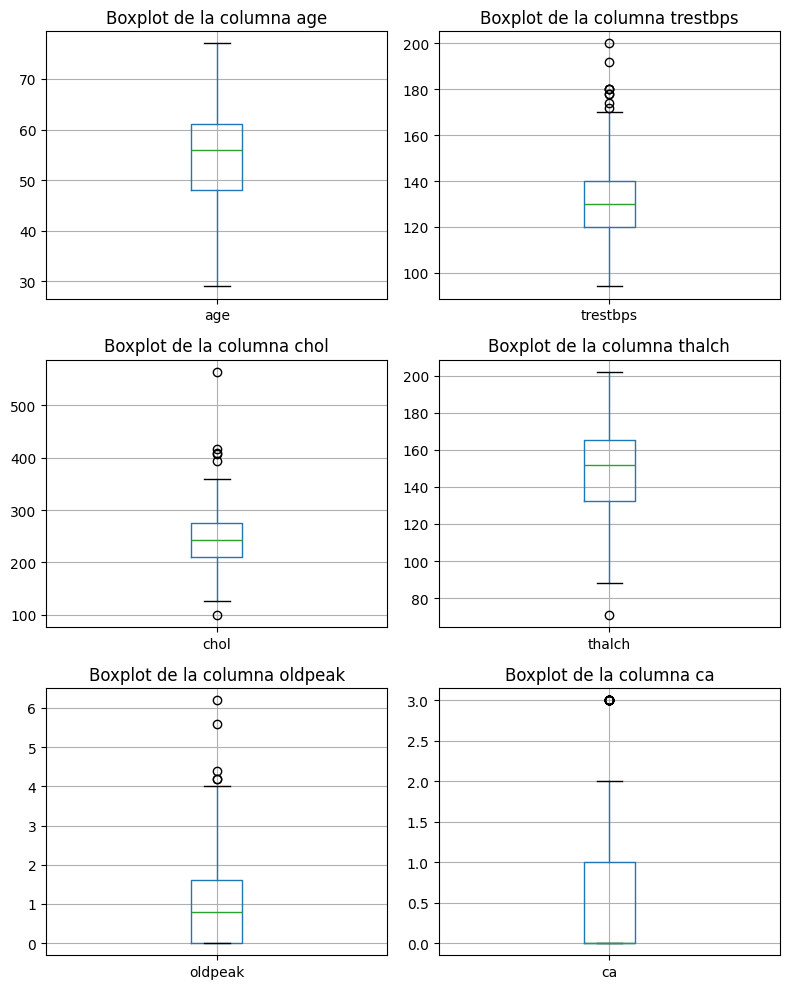

In [ ]:
#Columnas numéricas:
df_num=df.select_dtypes(include='number').drop('num',axis=1) #num es la columna sobre padecimiento o no
cols_num=df_num.columns
print(f'Las columnas numéricas son {df_num.shape[1]}: {cols_num}')

#Boxplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()

for i, col in enumerate(cols_num):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de la columna {col}')

plt.tight_layout()
plt.show()

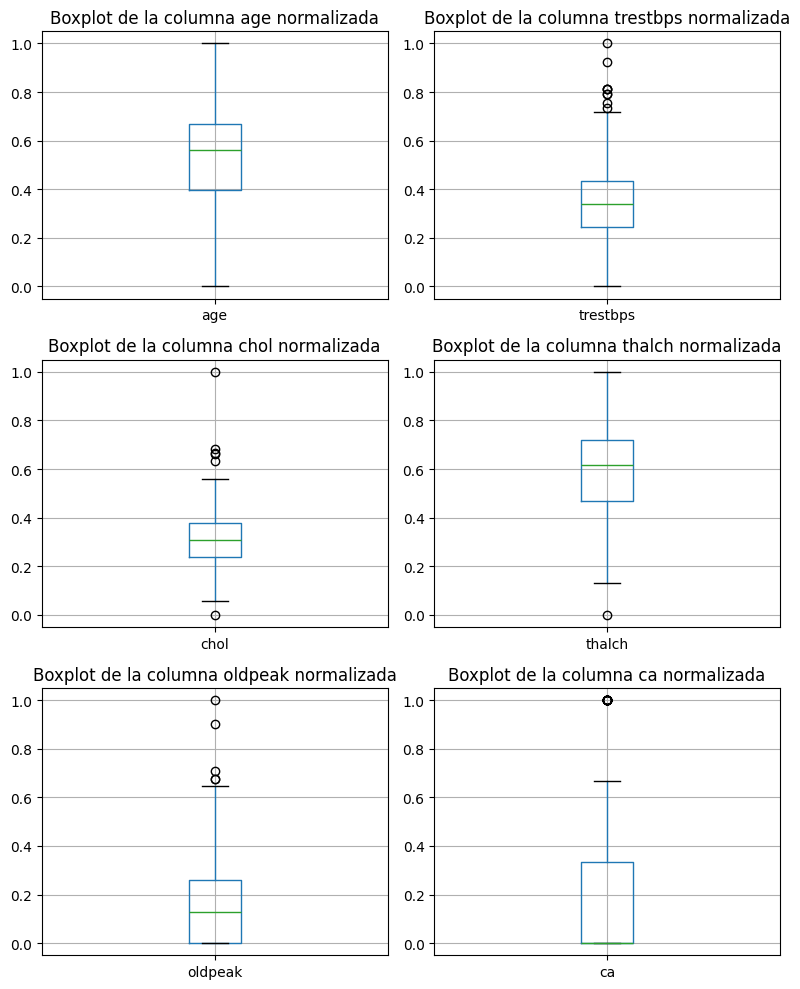

In [ ]:
#Escalamiento mediante normalización:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#Aplicando el escalador a la lista de columnas numéricas
df[cols_num] = scaler.fit_transform(df[cols_num])

#Boxplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,10))
axes = axes.flatten()

for i, col in enumerate(cols_num):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de la columna {col} normalizada')

plt.tight_layout()
plt.show()


Como aún hay outliers, se tendría que ver qué significa su presencia y cómo manejarlos. Podríamos escalar mediante una transformación logarítmica, de raíz cuadrada, etc, pero como el principal objetivo en este notebook es mostrar cómo se trabaja con el algoritmo de clasificación K-NN, vamos a centrarnos más en ello y eliminar los valores atípicos.

Teniendo el rango intercuartil $IQR = Q_3 - Q_1$, los outliers son el conjunto de valores que cumplen con las siguientes condiciones:

* $$
\{\text{Upper Outliers}\} > Q_3+(1.5 \cdot IQR)
$$

* $$
\{\text{Lower Outliers}\} < Q_1-(1.5 \cdot IQR)
$$

Eliminaremos todos los valores que cumplan con los criterios anteriores.





In [ ]:
#Calculamos el IQR, Q1 y Q3 del dataframe con columnas numéricas, df_num
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

#Lower y Upper outliers:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#Filtrando el dataframe original (df) conservando solo los outliers de cada columna numérica excluyendo 'num'
df_outliers = df[((df_num < lower) | (df_num > upper)).any(axis=1)]
print(df_outliers.shape)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')
print(f'El porcentaje de outliers presentes en la base de datos es: {round((df_outliers.shape[0]/df.shape[0])*100,2)} %')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Eliminando los outliers del dataframe original mediante la estructura anterior
df_preprocesado = df[~((df_num < lower) | (df_num > upper)).any(axis=1)]
print(df_preprocesado.shape)


(36, 14)
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
El porcentaje de outliers presentes en la base de datos es: 12.04 %
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
(263, 14)


# **Modelo K-NN**

Usaremos la distancia euclidiana y la Manhattan.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

#Características y etiquetas
X = df_preprocesado.drop('num', axis=1) #Matriz de diseño
y = df_preprocesado['num'] #Vector de etiquetas
print(X.shape)

#Separando los datos categóricos (KNN trabaja solo con datos numéricos)
categoricos = X.select_dtypes(include=['object']).columns

#Utilizando el transformador OHE para transformar los valores categóricos a numéricos
transformador = ColumnTransformer(transformers=[('OHE', OneHotEncoder(handle_unknown='ignore'), categoricos)])

#División del conjunto de datos, 70%-30% train-test para los modelos con métrica euclidiana y del taxi
X_train_euc, X_test_euc, y_train_euc, y_test_euc = train_test_split(X, y, test_size=0.3, random_state=170119)
X_train_cab, X_test_cab, y_train_cab, y_test_cab = train_test_split(X, y, test_size=0.3, random_state=170119)


(263, 13)


Usaremos una [pipeline](https://github.com/Bronquivoide/Machine_Learning_Fundamentals/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado%20con%20Scikit-learn.pdf) para cada modelo.

Así mismo tomaremos la regla empírica para elegir $K$:

$$
K= \sqrt{n}=\sqrt{len(DataFrame)}
$$

Posteriormente evaluaremos el rendimiento del modelo de clasificación mediante métricas. Primeramente, la métrica por default en scikit-learn es Accuracy.

In [ ]:
#Elección del hiperparámetro K
K = round(np.sqrt(len(X)))
print(f'El valor de K por la regla empírica es {K}, y tomando la convención de tomar K impar, vamos a tomar el hiperparámetro como K= {K-1} ')
K_optimo=15
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Pipeline para K-NN con métrica euclidiana
modelo_euc = Pipeline(steps=[('OHE', transformador),('knn', KNeighborsClassifier(n_neighbors=K_optimo, metric='euclidean')) ])

#Pipeline para K-NN con Manhattan
modelo_cab = Pipeline(steps=[('OHE', transformador),('knn', KNeighborsClassifier(n_neighbors=K_optimo, metric='manhattan')) ])

#Entrenamiento
modelo_euc.fit(X_train_euc, y_train_euc)
modelo_cab.fit(X_train_cab, y_train_cab)

#Métrica Accuracy para ambos modelos
accuracy_euc = modelo_euc.score(X_test_euc, y_test_euc) #score() regresa por default la Accuracy
print(f'Accuracy del modelo KNN con distancia euclidiana: {round(accuracy_euc,2)}')

accuracy_cab = modelo_cab.score(X_test_cab, y_test_cab)
print(f'Accuracy del modelo KNN con distancia Manhattan : {round(accuracy_cab,2)}')


El valor de K por la regla empírica es 16, y tomando la convención de tomar K impar, vamos a tomar el hiperparámetro como K= 15 
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Accuracy del modelo KNN con distancia euclidiana: 0.84
Accuracy del modelo KNN con distancia Manhattan : 0.84


Para evaluar el rendimiento con otras [métricas de clasificación](https://github.com/Bronquivoide/Machine_Learning_Fundamentals/blob/main/Supervised%20Learning/M%C3%A9tricas%20De%20Clasificaci%C3%B3n.pdf), debido a la estructura de las funciones en scikit-learn, necesitamos las etiquetas verdaderas y las predichas por el modelo.

Recall del modelo KNN con distancia Euclidiana:  0.81
Recall del modelo KNN con distancia Manhattan :  0.81
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Precision del modelo KNN con distancia Euclidiana:  0.83
Precision del modelo KNN con distancia Manhattan :  0.83
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
F1-score del modelo KNN con distancia Euclidiana:  0.82
F1-score del modelo KNN con distancia Manhattan :  0.82
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


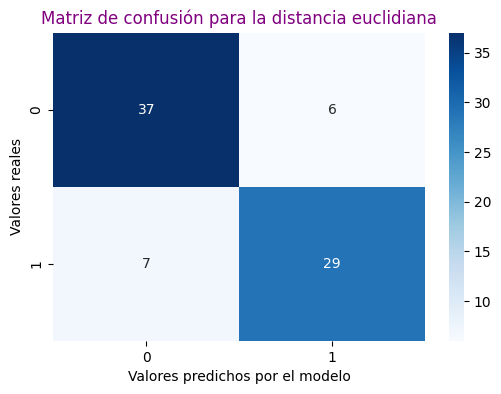

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


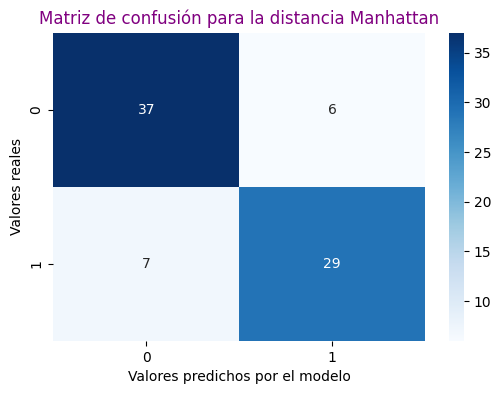

In [ ]:
#Predicciones de ambos modelos
y_pred_euc = modelo_euc.predict(X_test_euc)
y_pred_cab = modelo_cab.predict(X_test_cab)

#Métrica Recall para ambos modelos
recall_euc = recall_score(y_test_euc, y_pred_euc, average='binary') #Al ser clasificación de padecimiento o no, usamos el argumento average='binary'
recall_cab = recall_score(y_test_cab, y_pred_cab, average='binary')

print(f'Recall del modelo KNN con distancia Euclidiana: {recall_euc: .2f}')
print(f'Recall del modelo KNN con distancia Manhattan : {recall_cab: .2f}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Métrica Precision para ambos modelos
precision_euc = precision_score(y_test_euc, y_pred_euc, average='binary')
precision_cab = precision_score(y_test_cab, y_pred_cab, average='binary')

print(f'Precision del modelo KNN con distancia Euclidiana: {precision_euc: .2f}')
print(f'Precision del modelo KNN con distancia Manhattan : {precision_cab: .2f}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')


#Métrica F1-Score para ambos modelos
f1_euc = f1_score(y_test_euc, y_pred_euc, average='binary')
f1_cab = f1_score(y_test_cab, y_pred_cab, average='binary')

print(f'F1-score del modelo KNN con distancia Euclidiana: {f1_euc: .2f}')
print(f'F1-score del modelo KNN con distancia Manhattan : {f1_cab: .2f}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Matriz de confusión
CM_euc = confusion_matrix(y_test_euc, y_pred_euc)
plt.figure(figsize=(6, 4))
sns.heatmap(CM_euc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores predichos por el modelo')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión para la distancia euclidiana', color='purple')
plt.show()
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

CM_cab = confusion_matrix(y_test_cab, y_pred_cab)
plt.figure(figsize=(6, 4))
sns.heatmap(CM_cab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores predichos por el modelo')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión para la distancia Manhattan', color='purple')
plt.show()

# **Sobre el rendimiento del modelo**

Siendo que se obtuvieron los mismos resultados para los dos tipos de distancias abordadas, esto puede ser un indicador de que el modelo puede ser robusto ante la eleccion de la métrica de distancia, es decir, su rendimiento no depende fuertemente de la forma específica de la métrica entre los *data points*.

Posiblemente en el preprocesamiento se redujeron las diferencias entre una distancia u otra.

